<a href="https://colab.research.google.com/github/george-kan/fastai/blob/main/Chapter2/Chapter_2_notes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -Uqq fastbook
!pip install git+https://github.com/Joeclinton1/google-images-download.git


     |████████████████████████████████| 727kB 16.2MB/s 
     |████████████████████████████████| 194kB 59.9MB/s 
     |████████████████████████████████| 51kB 10.1MB/s 
     |████████████████████████████████| 1.2MB 33.4MB/s 
     |████████████████████████████████| 61kB 10.6MB/s 
  Cloning https://github.com/Joeclinton1/google-images-download.git to /tmp/pip-req-build-briylwlf
  Running command git clone -q https://github.com/Joeclinton1/google-images-download.git /tmp/pip-req-build-briylwlf
     |████████████████████████████████| 911kB 16.5MB/s 
  Created wheel for google-images-download: filename=google_images_download-2.8.0-py2.py3-none-any.whl size=15792 sha256=0ff893205bdbefed8c0ff9c43aa313e4a145b9202ee953d7e9161968c1453ef0
  Stored in directory: /tmp/pip-ephem-wheel-cache-fw0nhivw/wheels/1a/36/c9/53bd827bc241b69fe47b90731625459627f82694ecd8a88273
Successfully built google-images-download


In [2]:
from fastai.vision.all import *
from fastbook import *

In [11]:
from google_images_download import google_images_download   #importing the library

response = google_images_download.googleimagesdownload()   #class instantiation

arguments = {"keywords":"polar bear,grizzly bear,black bear,teddy bear","limit":100,"print_urls":False}   #creating list of arguments
paths = response.download(arguments)   #passing the arguments to the function
print(paths)   #printing absolute paths of the downloaded images


Item no.: 1 --> Item name = polar bear
Evaluating...
Starting Download...
Completed Image ====> 1.polar_bear_on_ice_in_svalbard_norway_ww294883.jpg
Completed Image ====> 2.polar_bear_with_cubs_in_wapusk_ww266666.jpg
Completed Image ====> 3.387489f1b8413ff360c3eead07c710621c-polar-bears.rsquare.w1200.jpg
Completed Image ====> 4.84081_nor20200720bearafp_1595259311962.jpeg
Completed Image ====> 5.polar_bear_-_alaska_%28cropped%29.jpg
Completed Image ====> 6.1340901-polar-bear-churchill.jpg
Completed Image ====> 7.polar-bear-7.jpg
Completed Image ====> 8.mammal_polar_bear_cubs_fighting_alaska_michael_henry_600x300.ashx.jpg
Completed Image ====> 9.0_polar-bear-carries-the-head-of-a-polar-bear-cub-2009.jpg
Completed Image ====> 10.janet-the-polar-bear-nanuk-polar-bear-lodge-george-turner-photo.jpg
Completed Image ====> 11.200720030735-01-polar-bear-svalbard-0709-large-169.jpg
Completed Image ====> 12.maxresdefault.jpg
Completed Image ====> 13.ct_110915-23.jpg
Completed Image ====> 14.5e4c67

In [4]:
images = paths[0]

data_transforms = transforms.Compose([
        transforms.RandomResizedCrop(128, min_scale = 0.3),
        transforms.ToTensor()])

train_x = []
train_y = []
for bear, pictures in images.items():
    train_x += [data_transforms(Image.open(x)) for x in pictures]
    train_y += [bear]*len(pictures)

NameError: ignored

In [ ]:
images = paths[0]
train_x = []
train_y = []
for bear, pictures in images.items():
    train_x += [x for x in pictures]
    train_y += [bear]*len(pictures)

data_list = list(zip(train_x, train_y))

In [ ]:
data_list[200]

In [12]:
bears = DataBlock(
    blocks = (ImageBlock, CategoryBlock),
    get_items = get_image_files,
    splitter = RandomSplitter(valid_pct=0.2, seed = 42),
    get_y = parent_label,
    item_tfms=Resize(128)
)

In [6]:
dls = bears.dataloaders('/content/downloads/')

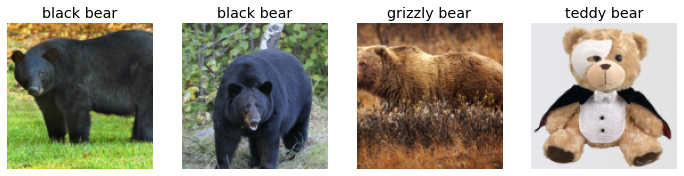

In [7]:
dls.valid.show_batch(max_n = 4, nrows = 1)

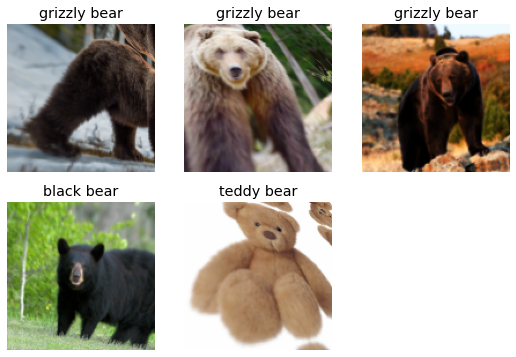

In [8]:
bears = bears.new(item_tfms = Resize(128), batch_tfms = aug_transforms(mult = 2))
dls = bears.dataloaders('/content/downloads/', bs = 5)
dls.train.show_batch(max_n = 8, nrows = 2, unique = False)

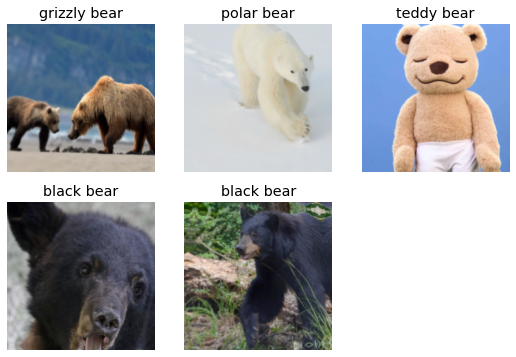

In [13]:
bears = bears.new(item_tfms = RandomResizedCrop(224, min_scale = 0.5), batch_tfms = aug_transforms())
dls = bears.dataloaders('/content/downloads/', bs = 5)
dls.train.show_batch(max_n = 8, nrows = 2, unique = False)

In [14]:
learn = cnn_learner(dls, resnet18, metrics = error_rate)
learn.fine_tune(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.017344,0.068672,0.037975,00:15


epoch,train_loss,valid_loss,error_rate,time
0,0.581877,0.125627,0.012658,00:15
1,0.596585,0.152642,0.050633,00:15
2,0.401748,0.048348,0.012658,00:16
3,0.349321,0.075249,0.037975,00:15


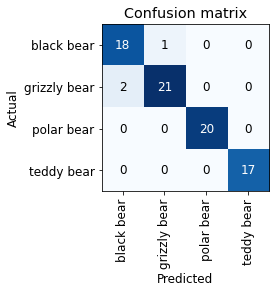

In [15]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

In [24]:
from fastai.vision.widgets import *
cleaner = ImageClassifierCleaner(learn)
cleaner

FileNotFoundError: ignored

In [23]:
for idx in cleaner.delete(): cleaner.fns[idx].unlink()

epoch,train_loss,valid_loss,error_rate,time
0,1.078331,0.088315,0.037975,00:15


epoch,train_loss,valid_loss,error_rate,time
0,0.345200,0.063037,0.050633,00:16
1,0.425544,0.128044,0.050633,00:15
2,0.404471,0.048965,0.025316,00:16
3,0.346953,0.057137,0.025316,00:15


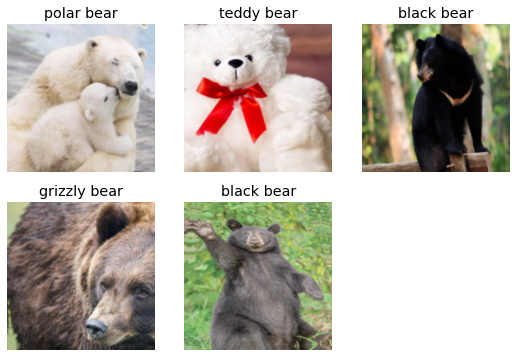

In [26]:
bears = bears.new(item_tfms = RandomResizedCrop(224, min_scale = 0.5), batch_tfms = aug_transforms())
dls = bears.dataloaders('/content/downloads/', bs = 5)
dls.train.show_batch(max_n = 8, nrows = 2, unique = False)
learn = cnn_learner(dls, resnet18, metrics = error_rate)
learn.fine_tune(4)

In [ ]:
cleaner = ImageClassifierCleaner(learn)
cleaner

In [29]:
learn.export()
path = Path()
path.ls(file_exts = '.pkl')

(#1) [Path('export.pkl')]

In [32]:
learn_inf = load_learner(path/'export.pkl')

In [33]:
learn_inf.dls.vocab

['black bear', 'grizzly bear', 'polar bear', 'teddy bear']

In [34]:
btn_upload = widgets.FileUpload()
btn_upload

FileUpload(value={}, description='Upload')

In [35]:
img = PILImage.create(btn_upload.data[-1])

In [37]:
out_pl = widgets.Output()
out_pl.clear_output()
with out_pl: display(img.to_thumb(128, 128))
out_pl

Output()

In [38]:
pred,pred_idx,probs = learn_inf.predict(img)

In [39]:
lbl_pred = widgets.Label()
lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'
lbl_pred

Label(value='Prediction: grizzly bear; Probability: 0.9998')

In [40]:
btn_run = widgets.Button(description='Classify')
btn_run

Button(description='Classify', style=ButtonStyle())

In [41]:
def on_click_classify(change):
    img = PILImage.create(btn_upload.data[-1])
    out_pl.clear_output()
    with_out_pl: display(img.to_thumb(128,128))
    pred, pred_idx, probs = learn_inf.predict(img)
    lbl_pred.value = f'Prediction: {pred}, Probability: {probs[pred_idx]:.04f}'

In [42]:
btn_run.on_click(on_click_classify)

In [43]:
VBox([widgets.Label('Select your bear'),
      btn_upload, btn_run, out_pl, lbl_pred])